In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fantasy-premier-league-2024/players.csv


In [7]:
data = pd.read_csv("/kaggle/input/fantasy-premier-league-2024/players.csv")

# Display basic information about the dataset
data_info = data.info()
data_head = data.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 79 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    861 non-null    int64  
 1   name                                  861 non-null    object 
 2   now_cost                              861 non-null    int64  
 3   position                              861 non-null    object 
 4   team                                  861 non-null    object 
 5   selected_by_percent                   861 non-null    float64
 6   influence_rank                        861 non-null    int64  
 7   corners_and_indirect_freekicks_order  74 non-null     float64
 8   own_goals                             861 non-null    int64  
 9   cost_change_event                     861 non-null    int64  
 10  starts                                861 non-null    int64  
 11  transfers_in       

In [8]:
data_info, data_head


(None,
    id                          name  now_cost position     team  \
 0   1               Folarin Balogun        44      FWD  Arsenal   
 1   2           Cédric Alves Soares        38      DEF  Arsenal   
 2   3                Mohamed Elneny        44      MID  Arsenal   
 3   4         Fábio Ferreira Vieira        54      MID  Arsenal   
 4   5  Gabriel dos Santos Magalhães        54      DEF  Arsenal   
 
    selected_by_percent  influence_rank  corners_and_indirect_freekicks_order  \
 0                  0.2             703                                   NaN   
 1                  0.5             528                                   NaN   
 2                  0.1             515                                   NaN   
 3                  0.1             411                                   NaN   
 4                 28.1              58                                   NaN   
 
    own_goals  cost_change_event  ...  cost_change_event_fall  selected_rank  \
 0          0  

**Key Metrics**

* now_cost: The current price of the player in the fantasy football game.
* selected_by_percent: The percentage of fantasy managers who have selected the player.
* influence_rank: The player's rank based on their impact on their team's performance.
* ict_index: A composite score measuring the player's influence, creativity, and threat.
* minutes: The total playing time of the player in minutes.



* points_per_game_rank: The player's rank based on their average points per game.
* starts: The number of matches the player has started.
* transfers_in: The total number of times the player has been transferred into fantasy teams.
* own_goals: The number of own goals scored by the player.
* cost_change_event: The change in the player's cost after the latest game week.
* red_cards: The total number of red cards received by the player.

* expected_goals_conceded: The expected number of goals the player or their team is predicted to concede.
* expected_goal_involvements_per_90: The expected goal contributions (goals + assists) per 90 minutes.
* form_rank_type: The player's rank based on their recent form.
* saves_per_90: The average number of saves made by the goalkeeper per 90 minutes.
* value_form: A measure of the player's value based on their recent form.
* value_season: A measure of the player's value over the entire season.

* chance_of_playing_next_round: The percentage chance of the player playing in the next game week.
* transfers_out: The total number of times the player has been transferred out of fantasy teams.
* news: Updates or news about the player's status (e.g., injuries, transfers).

**Next Steps**
* Handle Missing Values: Address columns with missing data.
* Descriptive Statistics: Generate summary statistics for key columns.
* Data Cleaning: Ensure data types are correct and handle any inconsistencies.
* Exploratory Data Analysis (EDA): Explore relationships and patterns within the data.

In [9]:
# Handling missing values
missing_values_summary = data.isnull().sum()

# Descriptive statistics for numeric columns
descriptive_stats = data.describe()



In [11]:
missing_values_summary

id                                0
name                              0
now_cost                          0
position                          0
team                              0
                               ... 
chance_of_playing_next_round    204
ict_index                         0
minutes                           0
creativity_rank                   0
ep_this                           0
Length: 79, dtype: int64

In [13]:
descriptive_stats

,id,now_cost,selected_by_percent,influence_rank,corners_and_indirect_freekicks_order,own_goals,cost_change_event,starts,transfers_in,points_per_game_rank_type,...,cost_change_event_fall,selected_rank,value_season,points_per_game_rank,event_points,chance_of_playing_next_round,ict_index,minutes,creativity_rank,ep_this
count,861.000000,861.000000,861.000000,861.000000,74.000000,861.000000,861.000000,861.000000,8.610000e+02,861.000000,...,861.000000,861.000000,861.000000,861.000000,861.000000,657.000000,861.000000,861.000000,861.000000,861.000000
mean,431.290360,47.583043,1.738908,431.000000,2.567568,0.056911,-0.009292,9.454123,4.422481e+05,138.735192,...,0.009292,430.997677,6.772474,431.000000,1.242741,52.359209,46.639024,846.651568,431.000000,1.256446
std,249.050843,9.956143,5.615411,248.693587,1.261453,0.260169,0.159671,11.619222,1.196694e+06,100.366014,...,0.159671,248.694900,8.099885,248.693587,2.703630,49.020019,65.366762,1013.205123,248.693587,2.517796
min,1.000000,36.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,0.000000,0.000000e+00,1.000000,...,-1.000000,1.000000,-0.300000,1.000000,-3.000000,0.000000,0.000000,0.000000,1.000000,-1.000000
25%,216.000000,43.000000,0.000000,216.000000,1.250000,0.000000,0.000000,0.000000,1.383000e+03,54.000000,...,0.000000,216.000000,0.000000,216.000000,0.000000,0.000000,0.000000,0.000000,216.000000,0.000000
50%,431.000000,45.000000,0.100000,431.000000,2.500000,0.000000,0.000000,3.000000,1.200700e+04,111.000000,...,0.000000,431.000000,2.900000,431.000000,0.000000,75.000000,14.600000,325.000000,431.000000,0.000000
75%,647.000000,50.000000,0.700000,646.000000,3.750000,0.000000,0.000000,17.000000,1.944030e+05,218.000000,...,0.000000,646.000000,12.400000,646.000000,1.000000,100.000000,76.000000,1562.000000,646.000000,1.500000
max,862.000000,143.000000,73.300000,861.000000,6.000000,2.000000,1.000000,37.000000,1.074905e+07,372.000000,...,1.000000,861.000000,37.800000,861.000000,27.000000,100.000000,375.700000,3330.000000,861.000000,23.100000


Missing Values Summary

Here's an overview of columns with missing values:

* corners_and_indirect_freekicks_order: 787 missing values
* news: 532 missing values
* news_added: 204 missing values
* chance_of_playing_next_round: 204 missing values

**Next Steps**
* Handling Missing Values: Decide on strategies to handle missing values (e.g., imputation, removal).
* Data Cleaning: Ensure that all necessary data types are correct and handle any inconsistencies.
* Exploratory Data Analysis (EDA): Perform EDA to understand relationships and patterns in the data.


**Let's start by handling the missing values in the dataset. We can:**

* Drop columns with a significant number of missing values.
* Impute missing values where appropriate.
* Drop rows with missing values in key columns.

In [14]:
# Drop columns with a significant number of missing values
columns_to_drop = ['corners_and_indirect_freekicks_order', 'news']
data_cleaned = data.drop(columns=columns_to_drop)

# For columns with some missing values, impute or drop rows with missing values as appropriate
# For simplicity, let's drop rows with missing values for 'news_added' and 'chance_of_playing_next_round'
data_cleaned = data_cleaned.dropna(subset=['news_added', 'chance_of_playing_next_round'])

# Verify that the missing values have been handled
cleaned_missing_values_summary = data_cleaned.isnull().sum()

cleaned_missing_values_summary


id                              0
name                            0
now_cost                        0
position                        0
team                            0
                               ..
chance_of_playing_next_round    0
ict_index                       0
minutes                         0
creativity_rank                 0
ep_this                         0
Length: 77, dtype: int64

**Missing Values Handling Summary**

All columns now have no missing values after the following steps:

* Dropped columns: corners_and_indirect_freekicks_order, news
* Dropped rows with missing values in news_added and chance_of_playing_next_round

**Next Steps**


* Verify Data Types: Ensure all data types are correct.
* Generate Descriptive Statistics: For a better understanding of the data.
* Exploratory Data Analysis (EDA): Identify patterns and relationships in the data.

In [15]:
# Verify data types
data_cleaned.dtypes


id                                int64
name                             object
now_cost                          int64
position                         object
team                             object
                                 ...   
chance_of_playing_next_round    float64
ict_index                       float64
minutes                           int64
creativity_rank                   int64
ep_this                         float64
Length: 77, dtype: object

**Descriptive Statistics**

In [16]:
# Generate descriptive statistics for the cleaned dataset
cleaned_descriptive_stats = data_cleaned.describe()

cleaned_descriptive_stats


,id,now_cost,selected_by_percent,influence_rank,own_goals,cost_change_event,starts,transfers_in,points_per_game_rank_type,threat_rank_type,...,cost_change_event_fall,selected_rank,value_season,points_per_game_rank,event_points,chance_of_playing_next_round,ict_index,minutes,creativity_rank,ep_this
count,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,6.570000e+02,657.000000,657.000000,...,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000
mean,370.931507,48.884323,2.060883,397.621005,0.063927,-0.007610,10.844749,5.260964e+05,131.278539,130.914764,...,0.007610,395.905632,7.723592,399.806697,1.423135,52.359209,54.702588,968.547945,392.050228,1.431963
std,218.546320,10.867074,6.266481,246.990251,0.274181,0.170016,11.777288,1.303692e+06,97.574846,96.448704,...,0.170016,238.522888,8.208637,249.343248,2.946259,49.020019,68.638948,1023.926212,247.992935,2.722806
min,1.000000,37.000000,0.000000,1.000000,0.000000,-1.000000,0.000000,0.000000e+00,1.000000,1.000000,...,-1.000000,1.000000,-0.200000,1.000000,-3.000000,0.000000,0.000000,0.000000,1.000000,-1.000000
25%,184.000000,43.000000,0.000000,184.000000,0.000000,0.000000,0.000000,2.269000e+03,51.000000,51.000000,...,0.000000,186.000000,0.000000,186.000000,0.000000,0.000000,0.000000,0.000000,183.000000,0.000000
50%,369.000000,45.000000,0.100000,376.000000,0.000000,0.000000,6.000000,1.986000e+04,107.000000,107.000000,...,0.000000,392.000000,4.900000,375.000000,0.000000,75.000000,28.200000,613.000000,365.000000,0.000000
75%,548.000000,50.000000,1.100000,600.000000,0.000000,0.000000,20.000000,3.477800e+05,201.000000,199.000000,...,0.000000,594.000000,14.100000,610.000000,2.000000,100.000000,87.500000,1772.000000,592.000000,1.900000
max,836.000000,143.000000,73.300000,861.000000,2.000000,1.000000,37.000000,1.074905e+07,372.000000,372.000000,...,1.000000,861.000000,37.800000,861.000000,27.000000,100.000000,375.700000,3330.000000,861.000000,23.100000


**Exploratory Data Analysis (EDA)**

Identify Patterns:

Analyze key performance indicators like ict_index, minutes, points_per_game_rank.

Compare performance metrics across different positions and teams.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

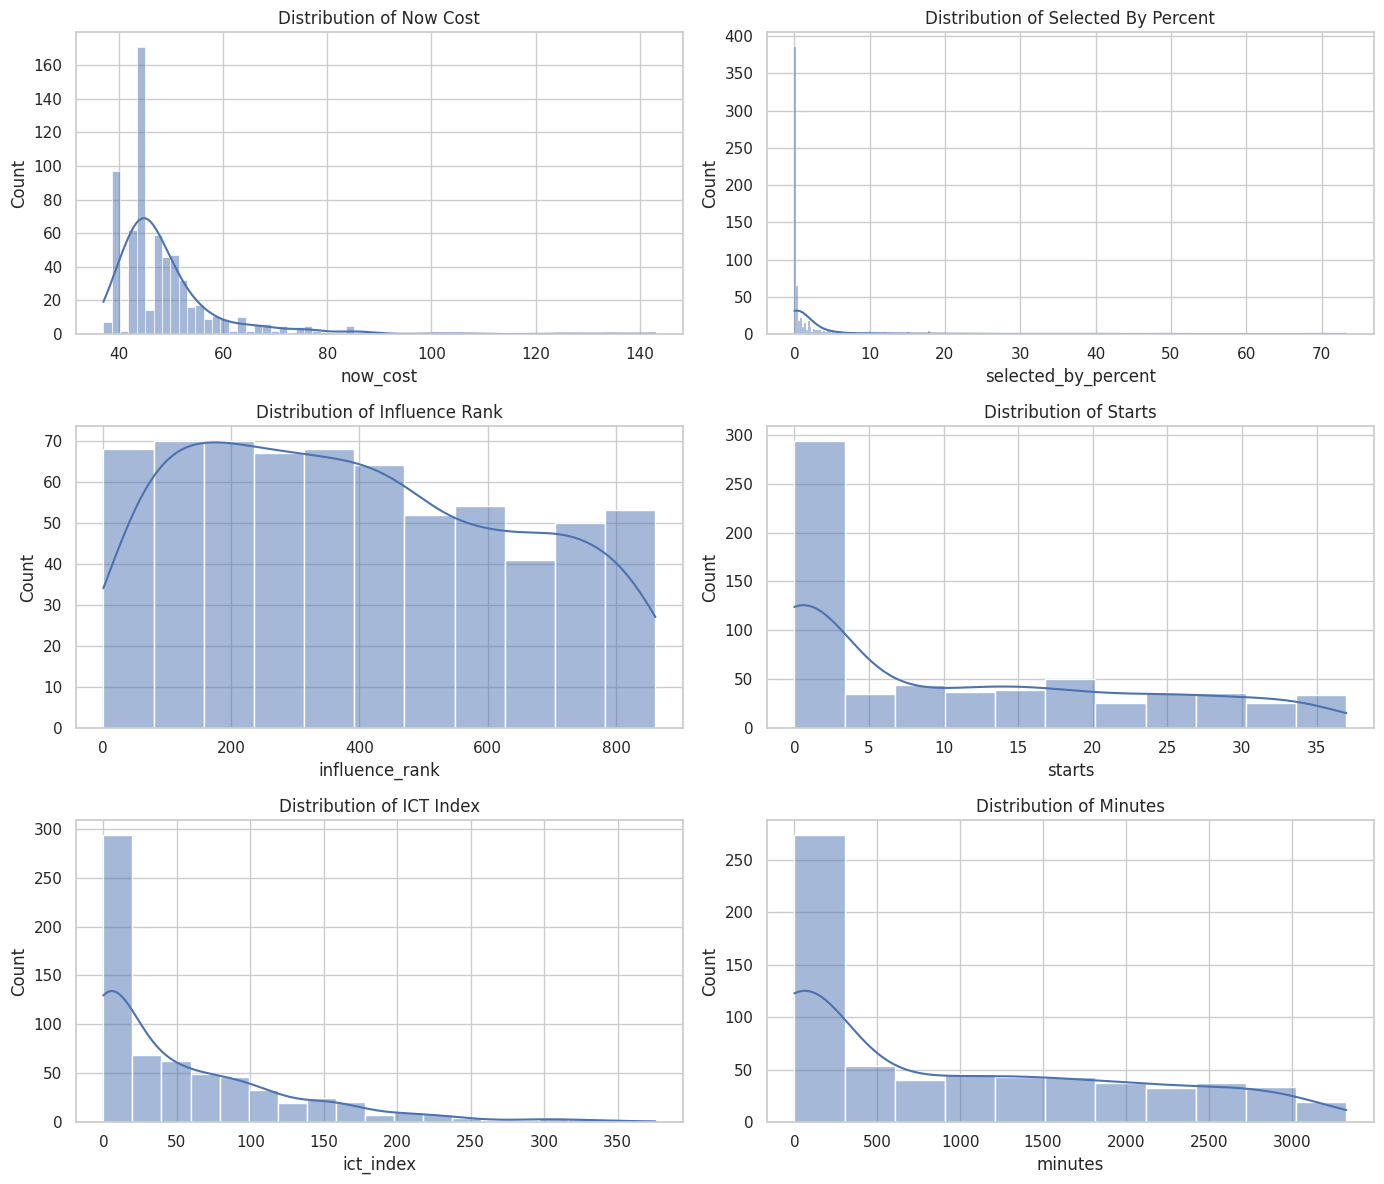

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualisation styles
sns.set(style="whitegrid")

# Distribution plots for key numeric columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))

# Plotting the distribution of 'now_cost'
sns.histplot(data_cleaned['now_cost'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Now Cost')

# Plotting the distribution of 'selected_by_percent'
sns.histplot(data_cleaned['selected_by_percent'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Selected By Percent')

# Plotting the distribution of 'influence_rank'
sns.histplot(data_cleaned['influence_rank'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Influence Rank')

# Plotting the distribution of 'starts'
sns.histplot(data_cleaned['starts'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Starts')

# Plotting the distribution of 'ict_index'
sns.histplot(data_cleaned['ict_index'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of ICT Index')

# Plotting the distribution of 'minutes'
sns.histplot(data_cleaned['minutes'], kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Distribution of Minutes')

# Adjust layout
plt.tight_layout()
plt.show()


**Visual Analysis of Key Numeric Columns**

The distribution plots reveal the following insights:

**Now Cost:**

* Most players have a now_cost between 40 and 60.
* A few players have a significantly higher cost, with a maximum around 143.

**Selected By Percent:**

* Majority of players are selected by a very small percentage of users.
* A few players are highly selected, with percentages going up to 73.3%.

**Influence Rank:**

* Influence rank is spread across the entire range from 1 to 861.
* A slight concentration around the lower and upper ranks.

**Starts:**

* Many players have very few starts (0-10).
* A smaller number of players have high starts, up to a maximum of 37.

**ICT Index:**

* ICT index values are skewed, with many players having low values.
* Some players have significantly high ICT index values, up to 375.7.

**Minutes:**

* Distribution shows many players with low playing minutes.
* Some players have very high minutes, up to 3330.

**Next Steps in EDA**

**Correlation Analysis:**

Analyze correlations between key performance metrics.

**Position-based Analysis:**

Explore differences in performance metrics across different player positions (e.g., DEF, MID, FWD).

**Team-based Analysis:**

Compare performance metrics across different teams.

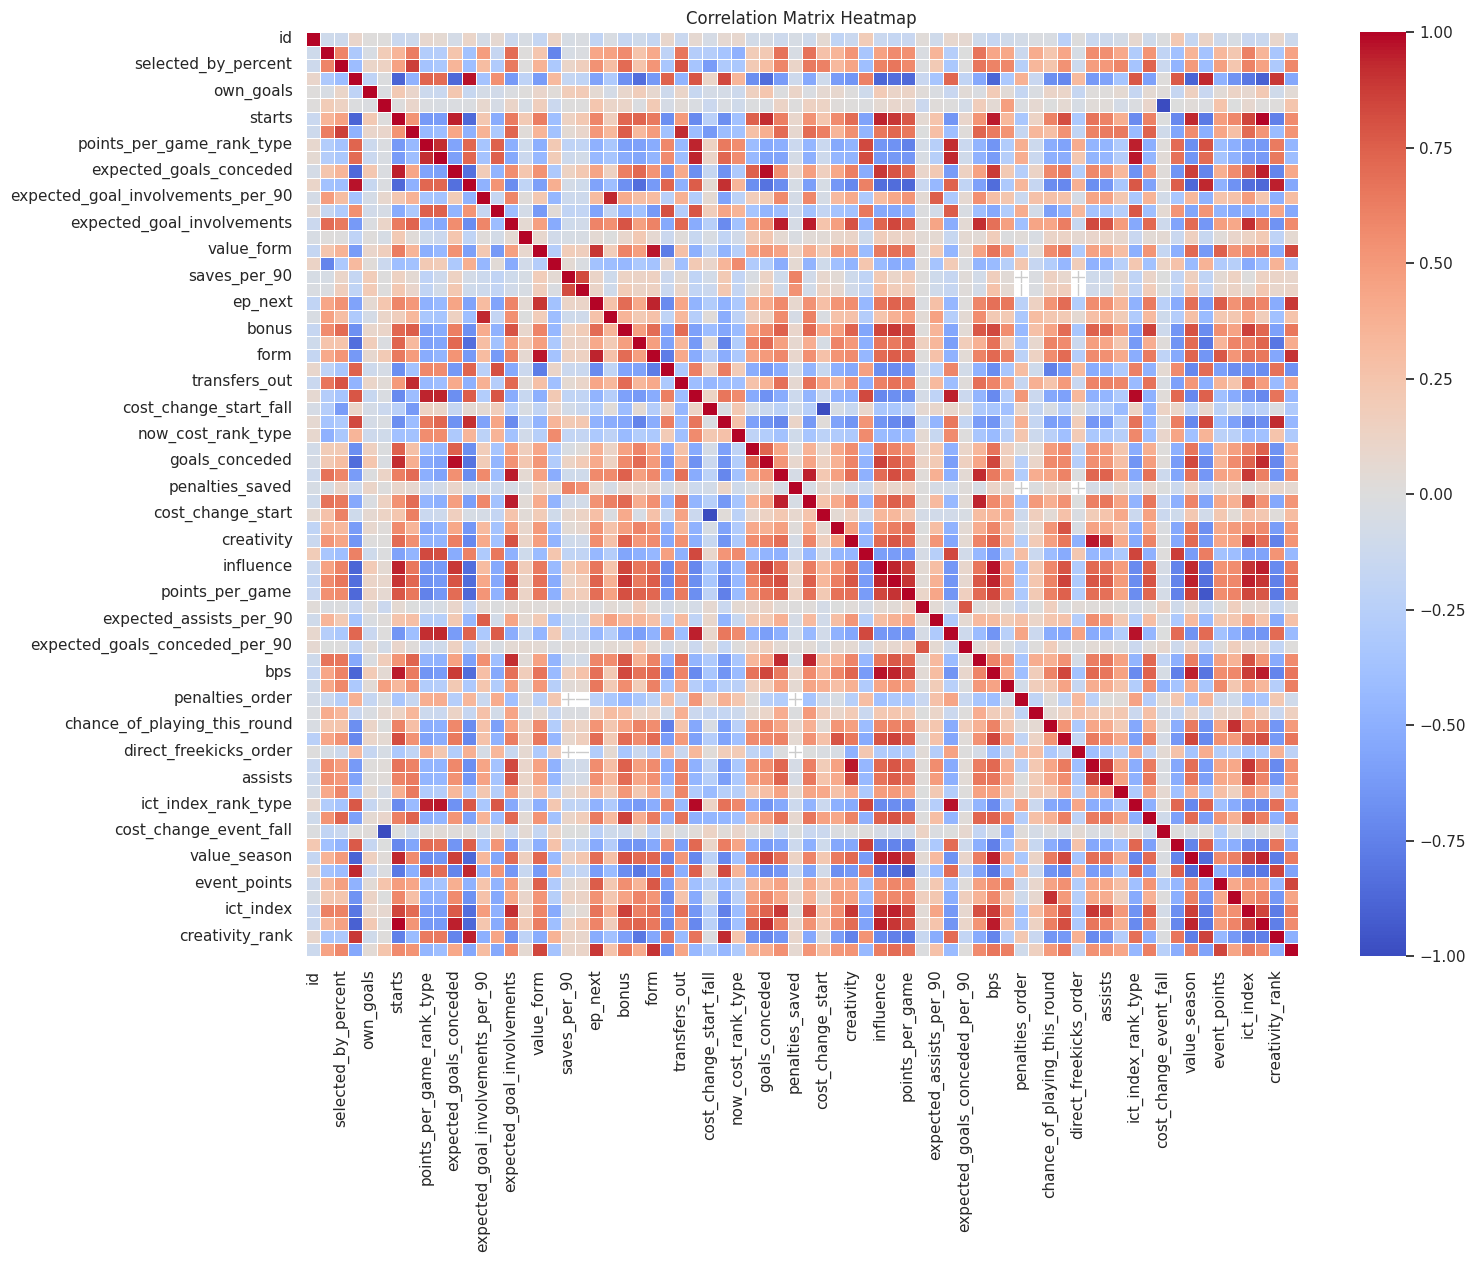

In [20]:
# Select only the numeric columns
numeric_data = data_cleaned.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Correlation Analysis**
The heatmap of the correlation matrix reveals several insights into the relationships between different numeric variables:

**Strong Positive Correlations:**

* points_per_game_rank and threat_rank_type show a strong positive correlation.
* transfers_in and selected_by_percent are positively correlated, indicating that players who are highly selected are also highly transferred in.
* minutes and starts have a strong positive correlation, as expected.

**Strong Negative Correlations:**

* influence_rank and points_per_game_rank_type show a strong negative correlation.
* now_cost_rank has a strong negative correlation with now_cost.

**Moderate Correlations:**

* ict_index shows moderate positive correlations with minutes and starts.
* selected_by_percent shows moderate correlations with several performance metrics like ict_index and transfers_in.

**Position-Based Analysis:**


In [21]:
# Position-based analysis: Generate descriptive statistics for key metrics grouped by position
position_stats = data_cleaned.groupby('position')[['now_cost', 'selected_by_percent', 'ict_index', 'minutes', 'starts', 'points_per_game_rank']].describe()

position_stats


now_cost                                                       \
            count       mean        std   min   25%   50%   75%    max   
position                                                                 
DEF         222.0  44.103604   5.620187  37.0  40.0  43.0  45.0   84.0   
FWD          89.0  54.955056  16.178627  42.0  45.0  49.0  57.0  143.0   
GKP          52.0  42.846154   4.827960  38.0  40.0  40.0  45.0   57.0   
MID         294.0  51.724490  10.715795  42.0  45.0  49.0  53.0  134.0   

         selected_by_percent            ... starts       points_per_game_rank  \
                       count      mean  ...    75%   max                count   
position                                ...                                     
DEF                    222.0  2.119369  ...  21.75  37.0                222.0   
FWD                     89.0  3.003371  ...  16.00  37.0                 89.0   
GKP                     52.0  2.640385  ...  16.25  37.0                 52.0   
MID                    294.0  1.628912  ...  20.00  36.0                294.0   

                                                                     
                mean         std   min    25%    50%     75%    max  
position                                                             
DEF       385.310811  205.467038  18.0  217.0  357.5  588.00  854.0  
FWD       425.505618  292.284735   2.0  149.0  413.0  744.00  861.0  
GKP       419.942308  265.684570  17.0  101.0  577.5  618.25  837.0  
MID       399.411565  262.636574   1.0  181.5  364.5  551.75  860.0  

[4 rows x 48 columns]

**Insights:**

Forwards (FWD) tend to have the highest mean now_cost and selected_by_percent, indicating they are more expensive and more popular.

Midfielders (MID) have the highest mean ICT index, suggesting they are key contributors in terms of creativity and overall influence.

Defenders (DEF) and Goalkeepers (GKP) have relatively higher playing minutes and starts.

**Team-Based Analysis:**

In [22]:
# Team-based analysis: Generate descriptive statistics for key metrics grouped by team
team_stats = data_cleaned.groupby('team')[['now_cost', 'selected_by_percent', 'ict_index', 'minutes', 'starts', 'points_per_game_rank']].describe()

team_stats


now_cost                                                  \
                  count       mean        std   min    25%   50%    75%   
team                                                                      
Arsenal            29.0  55.586207  13.140769  40.0  45.00  52.0  60.00   
Aston Villa        34.0  49.882353   9.111314  39.0  45.00  49.0  53.75   
Bournemouth        34.0  46.705882   5.474621  39.0  44.00  46.0  49.00   
Brentford          33.0  47.333333   7.720373  39.0  44.00  45.0  49.00   
Brighton           32.0  48.562500   7.061652  39.0  44.00  47.0  52.00   
Burnley            35.0  44.571429   4.654446  38.0  40.00  44.0  48.50   
Chelsea            42.0  49.642857   9.119321  39.0  43.25  47.0  53.75   
Crystal Palace     27.0  45.851852   5.156801  39.0  43.00  45.0  48.00   
Everton            26.0  47.846154   4.880101  40.0  44.25  46.5  51.25   
Fulham             29.0  47.206897   6.410813  40.0  44.00  45.0  50.00   
Liverpool          29.0  57.172414  19.842359  40.0  45.00  50.0  66.00   
Luton              38.0  43.921053   3.404144  38.0  40.50  44.0  45.75   
Man City           23.0  60.826087  23.648279  38.0  48.00  55.0  63.00   
Man Utd            39.0  49.846154  12.027465  39.0  42.50  45.0  52.00   
Newcastle          36.0  49.777778  11.068904  37.0  42.00  45.0  56.50   
Nott'm Forest      46.0  45.760870   4.512623  39.0  44.00  45.0  48.00   
Sheffield Utd      34.0  44.941176   4.518924  38.0  42.00  44.0  48.75   
Spurs              33.0  53.030303  18.199390  38.0  44.00  47.0  54.00   
West Ham           26.0  49.307692   8.587289  42.0  44.00  45.0  51.50   
Wolves             32.0  46.312500   4.568034  40.0  44.00  45.0  49.00   

                      selected_by_percent            ... starts        \
                  max               count      mean  ...    75%   max   
team                                                 ...                
Arsenal          88.0                29.0  7.062069  ...  29.00  37.0   
Aston Villa      89.0                34.0  2.461765  ...  22.75  36.0   
Bournemouth      70.0                34.0  0.888235  ...  20.00  37.0   
Brentford        77.0                33.0  0.984848  ...  21.00  36.0   
Brighton         64.0                32.0  1.812500  ...  17.00  33.0   
Burnley          55.0                35.0  0.217143  ...  13.50  31.0   
Chelsea          72.0                42.0  2.790476  ...  18.75  36.0   
Crystal Palace   60.0                27.0  0.829630  ...  22.00  36.0   
Everton          58.0                26.0  1.511538  ...  27.50  37.0   
Fulham           74.0                29.0  0.544828  ...  18.00  36.0   
Liverpool       134.0                29.0  3.655172  ...  22.00  35.0   
Luton            50.0                38.0  0.452632  ...  15.00  33.0   
Man City        143.0                23.0  9.386957  ...  27.50  33.0   
Man Utd          85.0                39.0  1.828205  ...  16.50  37.0   
Newcastle        84.0                36.0  3.994444  ...  16.75  36.0   
Nott'm Forest    63.0                46.0  0.217391  ...  16.50  34.0   
Sheffield Utd    55.0                34.0  0.320588  ...  14.50  33.0   
Spurs           125.0                33.0  3.096970  ...  25.00  34.0   
West Ham         76.0                26.0  1.926923  ...  29.50  35.0   
Wolves           55.0                32.0  0.471875  ...  24.25  35.0   

               points_per_game_rank                                        \
                              count        mean         std   min     25%   
team                                                                        
Arsenal                        29.0  340.724138  316.171619   5.0   41.00   
Aston Villa                    34.0  373.852941  264.854578   7.0  175.50   
Bournemouth                    34.0  389.970588  221.489652  21.0  255.00   
Brentford                      33.0  365.636364  234.265317  14.0  199.00   
Brighton                       32.0  387.281250  249.226576   9.0  192

**Insights:**

Man City and Liverpool have higher average costs and ICT indices, indicating they have several key players with high performance and influence.

Arsenal and Spurs have similar average costs but differ in ICT index and selection percentages.

**Performance Metrics Comparison:**


/tmp/ipykernel_32/1404675495.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='team', y='now_cost', data=data_cleaned, ci=None, ax=axes[0, 0])
/tmp/ipykernel_32/1404675495.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='team', y='selected_by_percent', data=data_cleaned, ci=None, ax=axes[0, 1])
/tmp/ipykernel_32/1404675495.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='team', y='ict_index', data=data_cleaned, ci=None, ax=axes[1, 0])
/tmp/ipykernel_32/1404675495.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='team', y='minutes', data=data_cleaned, ci=None, ax=axes[1, 1])
/tmp/ipykernel_32/1404675495.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='team

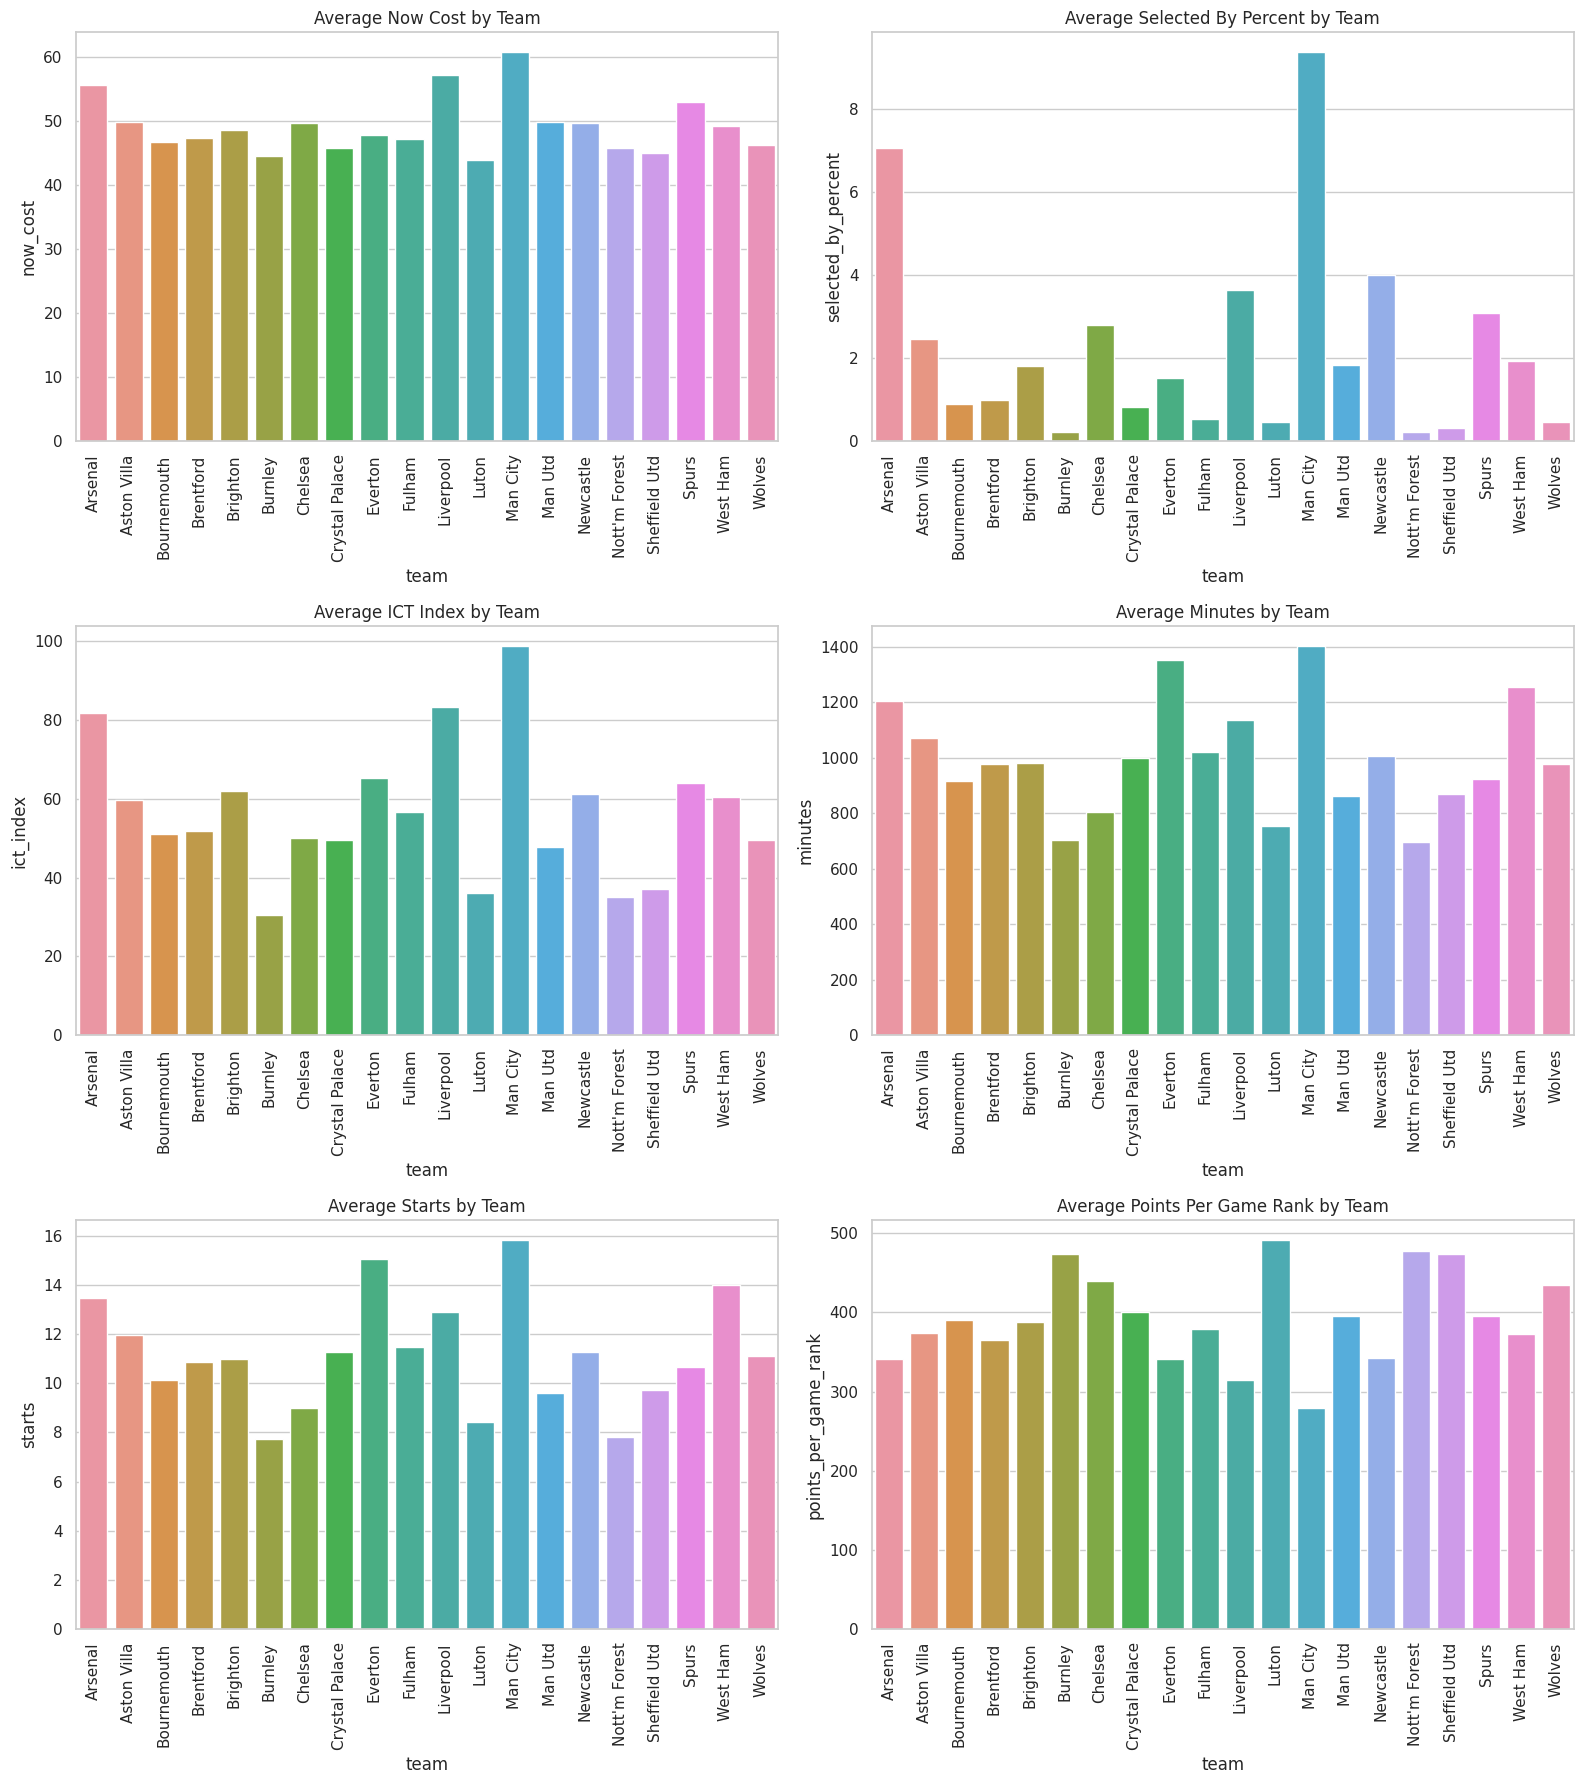

In [23]:
# Visualize team-based metrics
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))

# Average Now Cost by Team
sns.barplot(x='team', y='now_cost', data=data_cleaned, ci=None, ax=axes[0, 0])
axes[0, 0].set_title('Average Now Cost by Team')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)

# Average Selected By Percent by Team
sns.barplot(x='team', y='selected_by_percent', data=data_cleaned, ci=None, ax=axes[0, 1])
axes[0, 1].set_title('Average Selected By Percent by Team')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)

# Average ICT Index by Team
sns.barplot(x='team', y='ict_index', data=data_cleaned, ci=None, ax=axes[1, 0])
axes[1, 0].set_title('Average ICT Index by Team')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)

# Average Minutes by Team
sns.barplot(x='team', y='minutes', data=data_cleaned, ci=None, ax=axes[1, 1])
axes[1, 1].set_title('Average Minutes by Team')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90)

# Average Starts by Team
sns.barplot(x='team', y='starts', data=data_cleaned, ci=None, ax=axes[2, 0])
axes[2, 0].set_title('Average Starts by Team')
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=90)

# Average Points Per Game Rank by Team
sns.barplot(x='team', y='points_per_game_rank', data=data_cleaned, ci=None, ax=axes[2, 1])
axes[2, 1].set_title('Average Points Per Game Rank by Team')
axes[2, 1].set_xticklabels(axes[2, 1].get_xticklabels(), rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()


**Average Now Cost:**

* Man City and Liverpool players have the highest average costs, reflecting their high market value.
* Luton and Burnley players have the lowest average costs.

**Average Selected By Percent:**

* Arsenal, ManCity, and Liverpool players are more frequently selected by users, indicating their popularity and perceived value.
* Luton and Burnley players are the least selected.

**Average ICT Index:**

* Liverpool and Man City players have the highest ICT indices, indicating their overall influence and contribution to the game.
* Luton and Burnley players have the lowest ICT indices.

**Average Minutes:**

* Everton and Man City players have the highest average minutes, suggesting their regular inclusion in match lineups.
* Luton and Burnley players have the lowest average minutes.

**Average Starts:**

* Everton and Man City players also have the highest average starts.
* Luton and Burnley players have the lowest average starts.

**Average Points Per Game Rank:**

* Man City and Liverpool players have the best points per game ranks, reflecting their performance efficiency.
* Luton and Burnley players have the lowest ranks.

**Relationship Between Metrics**


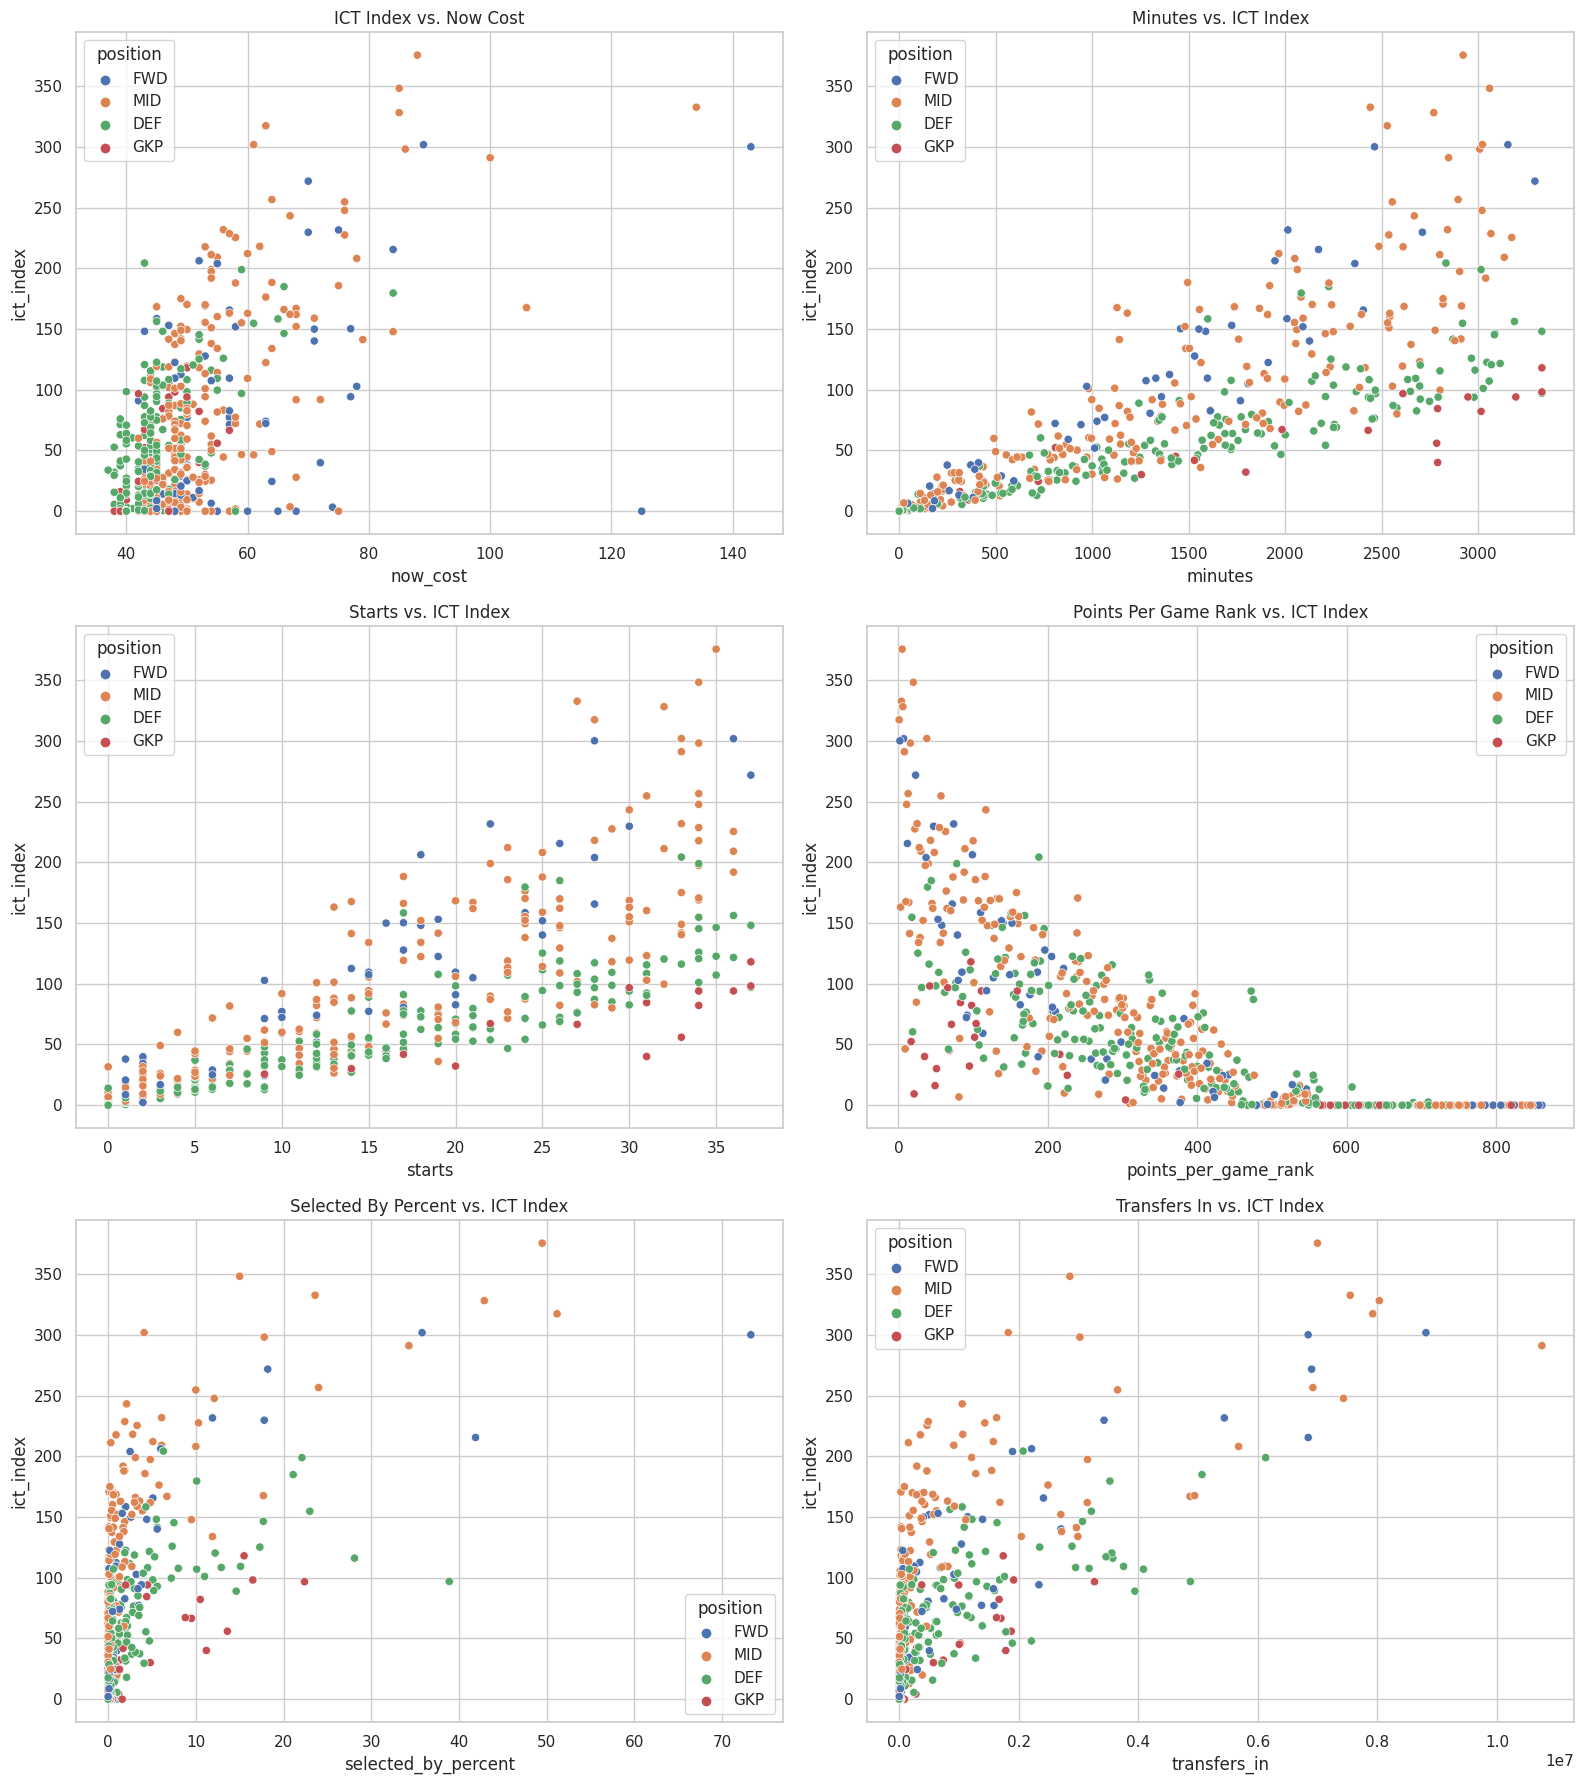

In [25]:
# Visualize relationships between metrics
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))

# Relationship between ICT Index and Now Cost
sns.scatterplot(x='now_cost', y='ict_index', hue='position', data=data_cleaned, ax=axes[0, 0])
axes[0, 0].set_title('ICT Index vs. Now Cost')

# Relationship between Minutes and ICT Index
sns.scatterplot(x='minutes', y='ict_index', hue='position', data=data_cleaned, ax=axes[0, 1])
axes[0, 1].set_title('Minutes vs. ICT Index')

# Relationship between Starts and ICT Index
sns.scatterplot(x='starts', y='ict_index', hue='position', data=data_cleaned, ax=axes[1, 0])
axes[1, 0].set_title('Starts vs. ICT Index')

# Relationship between Points Per Game Rank and ICT Index
sns.scatterplot(x='points_per_game_rank', y='ict_index', hue='position', data=data_cleaned, ax=axes[1, 1])
axes[1, 1].set_title('Points Per Game Rank vs. ICT Index')

# Relationship between Selected By Percent and ICT Index
sns.scatterplot(x='selected_by_percent', y='ict_index', hue='position', data=data_cleaned, ax=axes[2, 0])
axes[2, 0].set_title('Selected By Percent vs. ICT Index')

# Relationship between Transfers In and ICT Index
sns.scatterplot(x='transfers_in', y='ict_index', hue='position', data=data_cleaned, ax=axes[2, 1])
axes[2, 1].set_title('Transfers In vs. ICT Index')

# Adjust layout
plt.tight_layout()
plt.show()


**ICT Index vs. Now Cost:**

* There is a positive relationship between ict_index and now_cost.
* Forwards (FWD) and Midfielders (MID) generally have higher ICT indices and higher costs.

**Minutes vs. ICT Index:**

* Players with more minutes tend to have higher ICT indices.
* Defenders (DEF) and Goalkeepers (GKP) cluster at higher minutes with lower ICT indices.

**Starts vs. ICT Index:**

* Similar to minutes, more starts correlate with higher ICT indices.
* Midfielders (MID) and Forwards (FWD) have higher variability in ICT indices with increasing starts.

**Points Per Game Rank vs. ICT Index:**

* Higher ICT indices correlate with better points per game ranks.
* Forwards (FWD) and Midfielders (MID) show higher ICT indices for better ranks.

**Selected By Percent vs. ICT Index:**

* Players with higher ICT indices are more frequently selected.
* Forwards (FWD) and Midfielders (MID) show higher selection percentages with increasing ICT indices.

**Transfers In vs. ICT Index:**

* More transfers in correlate with higher ICT indices.
* Forwards (FWD) and Midfielders (MID) are more likely to have higher transfers in with increasing ICT indices.

**Top Players Analysis**

In [26]:
# Identify top players based on ICT Index, Minutes, and Points Per Game Rank
top_ict_index = data_cleaned.nlargest(10, 'ict_index')[['name', 'team', 'position', 'ict_index', 'now_cost', 'minutes', 'points_per_game_rank']]
top_minutes = data_cleaned.nlargest(10, 'minutes')[['name', 'team', 'position', 'minutes', 'ict_index', 'now_cost', 'points_per_game_rank']]
top_points_per_game_rank = data_cleaned.nsmallest(10, 'points_per_game_rank')[['name', 'team', 'position', 'points_per_game_rank', 'ict_index', 'now_cost', 'minutes']]

top_ict_index, top_minutes, top_points_per_game_rank


(                       name         team position  ict_index  now_cost  \
 17              Bukayo Saka      Arsenal      MID      375.7        88   
 550  Bruno Borges Fernandes      Man Utd      MID      348.4        85   
 443           Mohamed Salah    Liverpool      MID      332.8       134   
 526              Phil Foden     Man City      MID      328.3        85   
 286             Cole Palmer      Chelsea      MID      317.5        63   
 175             Pascal Groß     Brighton      MID      302.0        61   
 64            Ollie Watkins  Aston Villa      FWD      301.9        89   
 528          Erling Haaland     Man City      FWD      300.2       143   
 12          Martin Ødegaard      Arsenal      MID      298.3        86   
 763           Son Heung-min        Spurs      MID      291.2       100   
 
      minutes  points_per_game_rank  
 17      2922                     5  
 550     3059                    20  
 443     2441                     4  
 526     2770        

**Top Players Analysis:**

**Top 10 Players by ICT Index**

These players have the highest ICT Index, indicating their significant influence on the game:
1.	Bukayo Saka (Arsenal, MID): ICT Index = 375.7, Now Cost = 88, Minutes = 2922, Points Per Game Rank = 5
2.	Bruno Fernandes (Man Utd, MID): ICT Index = 348.4, Now Cost = 85, Minutes = 3059, Points Per Game Rank = 20
3.	Mohamed Salah (Liverpool, MID): ICT Index = 332.8, Now Cost = 134, Minutes = 2441, Points Per Game Rank = 4
4.	Phil Foden (Man City, MID): ICT Index = 328.3, Now Cost = 85, Minutes = 2770, Points Per Game Rank = 6
5.	Cole Palmer (Chelsea, MID): ICT Index = 317.5, Now Cost = 63, Minutes = 2529, Points Per Game Rank = 1
6.	Pascal Groß (Brighton, MID): ICT Index = 302.0, Now Cost = 61, Minutes = 3022, Points Per Game Rank = 38
7.	Ollie Watkins (Aston Villa, FWD): ICT Index = 301.9, Now Cost = 89, Minutes = 3154, Points Per Game Rank = 7
8.	Erling Haaland (Man City, FWD): ICT Index = 300.2, Now Cost = 143, Minutes = 2463, Points Per Game Rank = 2
9.	Martin Ødegaard (Arsenal, MID): ICT Index = 298.3, Now Cost = 86, Minutes = 3008, Points Per Game Rank = 16
10.	Son Heung-min (Spurs, MID): ICT Index = 291.2, Now Cost = 100, Minutes = 2847, Points Per Game Rank = 8

**Top 10 Players by Minutes**
These players have the highest playing minutes:
1.	William Saliba (Arsenal, DEF): Minutes = 3330, ICT Index = 97.0, Now Cost = 59, Points Per Game Rank = 31
2.	Jordan Pickford (Everton, GKP): Minutes = 3330, ICT Index = 98.2, Now Cost = 48, Points Per Game Rank = 42
3.	James Tarkowski (Everton, DEF): Minutes = 3330, ICT Index = 148.2, Now Cost = 46, Points Per Game Rank = 125
4.	André Onana (Man Utd, GKP): Minutes = 3330, ICT Index = 118.1, Now Cost = 50, Points Per Game Rank = 97
5.	Dominic Solanke (Bournemouth, FWD): Minutes = 3294, ICT Index = 271.9, Now Cost = 70, Points Per Game Rank = 23
6.	Mark Flekken (Brentford, GKP): Minutes = 3195, ICT Index = 94.1, Now Cost = 47, Points Per Game Rank = 111
7.	Antonee Robinson (Fulham, DEF): Minutes = 3188, ICT Index = 156.3, Now Cost = 45, Points Per Game Rank = 169
8.	Bruno Guimarães (Newcastle, MID): Minutes = 3174, ICT Index = 225.5, Now Cost = 58, Points Per Game Rank = 63
9.	Ollie Watkins (Aston Villa, FWD): Minutes = 3154, ICT Index = 301.9, Now Cost = 89, Points Per Game Rank = 7
10.	Declan Rice (Arsenal, MID): Minutes = 3135, ICT Index = 209.2, Now Cost = 55, Points Per Game Rank = 30
**Top 10 Players by Points Per Game Rank**

These players have the best points per game ranks:
1.	Cole Palmer (Chelsea, MID): Points Per Game Rank = 1, ICT Index = 317.5, Now Cost = 63, Minutes = 2529
2.	Erling Haaland (Man City, FWD): Points Per Game Rank = 2, ICT Index = 300.2, Now Cost = 143, Minutes = 2463
3.	Michael Olise (Crystal Palace, MID): Points Per Game Rank = 3, ICT Index = 163.2, Now Cost = 57, Minutes = 1182
4.	Mohamed Salah (Liverpool, MID): Points Per Game Rank = 4, ICT Index = 332.8, Now Cost = 134, Minutes = 2441
5.	Bukayo Saka (Arsenal, MID): Points Per Game Rank = 5, ICT Index = 375.7, Now Cost = 88, Minutes = 2922
6.	Phil Foden (Man City, MID): Points Per Game Rank = 6, ICT Index = 328.3, Now Cost = 85, Minutes = 2770
7.	Ollie Watkins (Aston Villa, FWD): Points Per Game Rank = 7, ICT Index = 301.9, Now Cost = 89, Minutes = 3154
8.	Son Heung-min (Spurs, MID): Points Per Game Rank = 8, ICT Index = 291.2, Now Cost = 100, Minutes = 2847
9.	Solly March (Brighton, MID): Points Per Game Rank = 9, ICT Index = 46.4, Now Cost = 61, Minutes = 555
10.	Kevin De Bruyne (Man City, MID): Points Per Game Rank = 10, ICT Index = 167.7, Now Cost = 106, Minutes = 1129



1.	Performance Metrics by Team and Position:

•	Analyze how key performance metrics vary across different teams and positions.

2.	Top Performers in Specific Metrics:

•	Identify top performers in metrics like ict_index, minutes, and points_per_game_rank for each position.

3.	Impact of Cost on Performance:

•	Examine the relationship between now_cost and performance metrics such as ict_index and points_per_game_rank.



In [27]:
# Performance metrics by team and position
performance_metrics = ['now_cost', 'ict_index', 'minutes', 'points_per_game_rank', 'selected_by_percent']



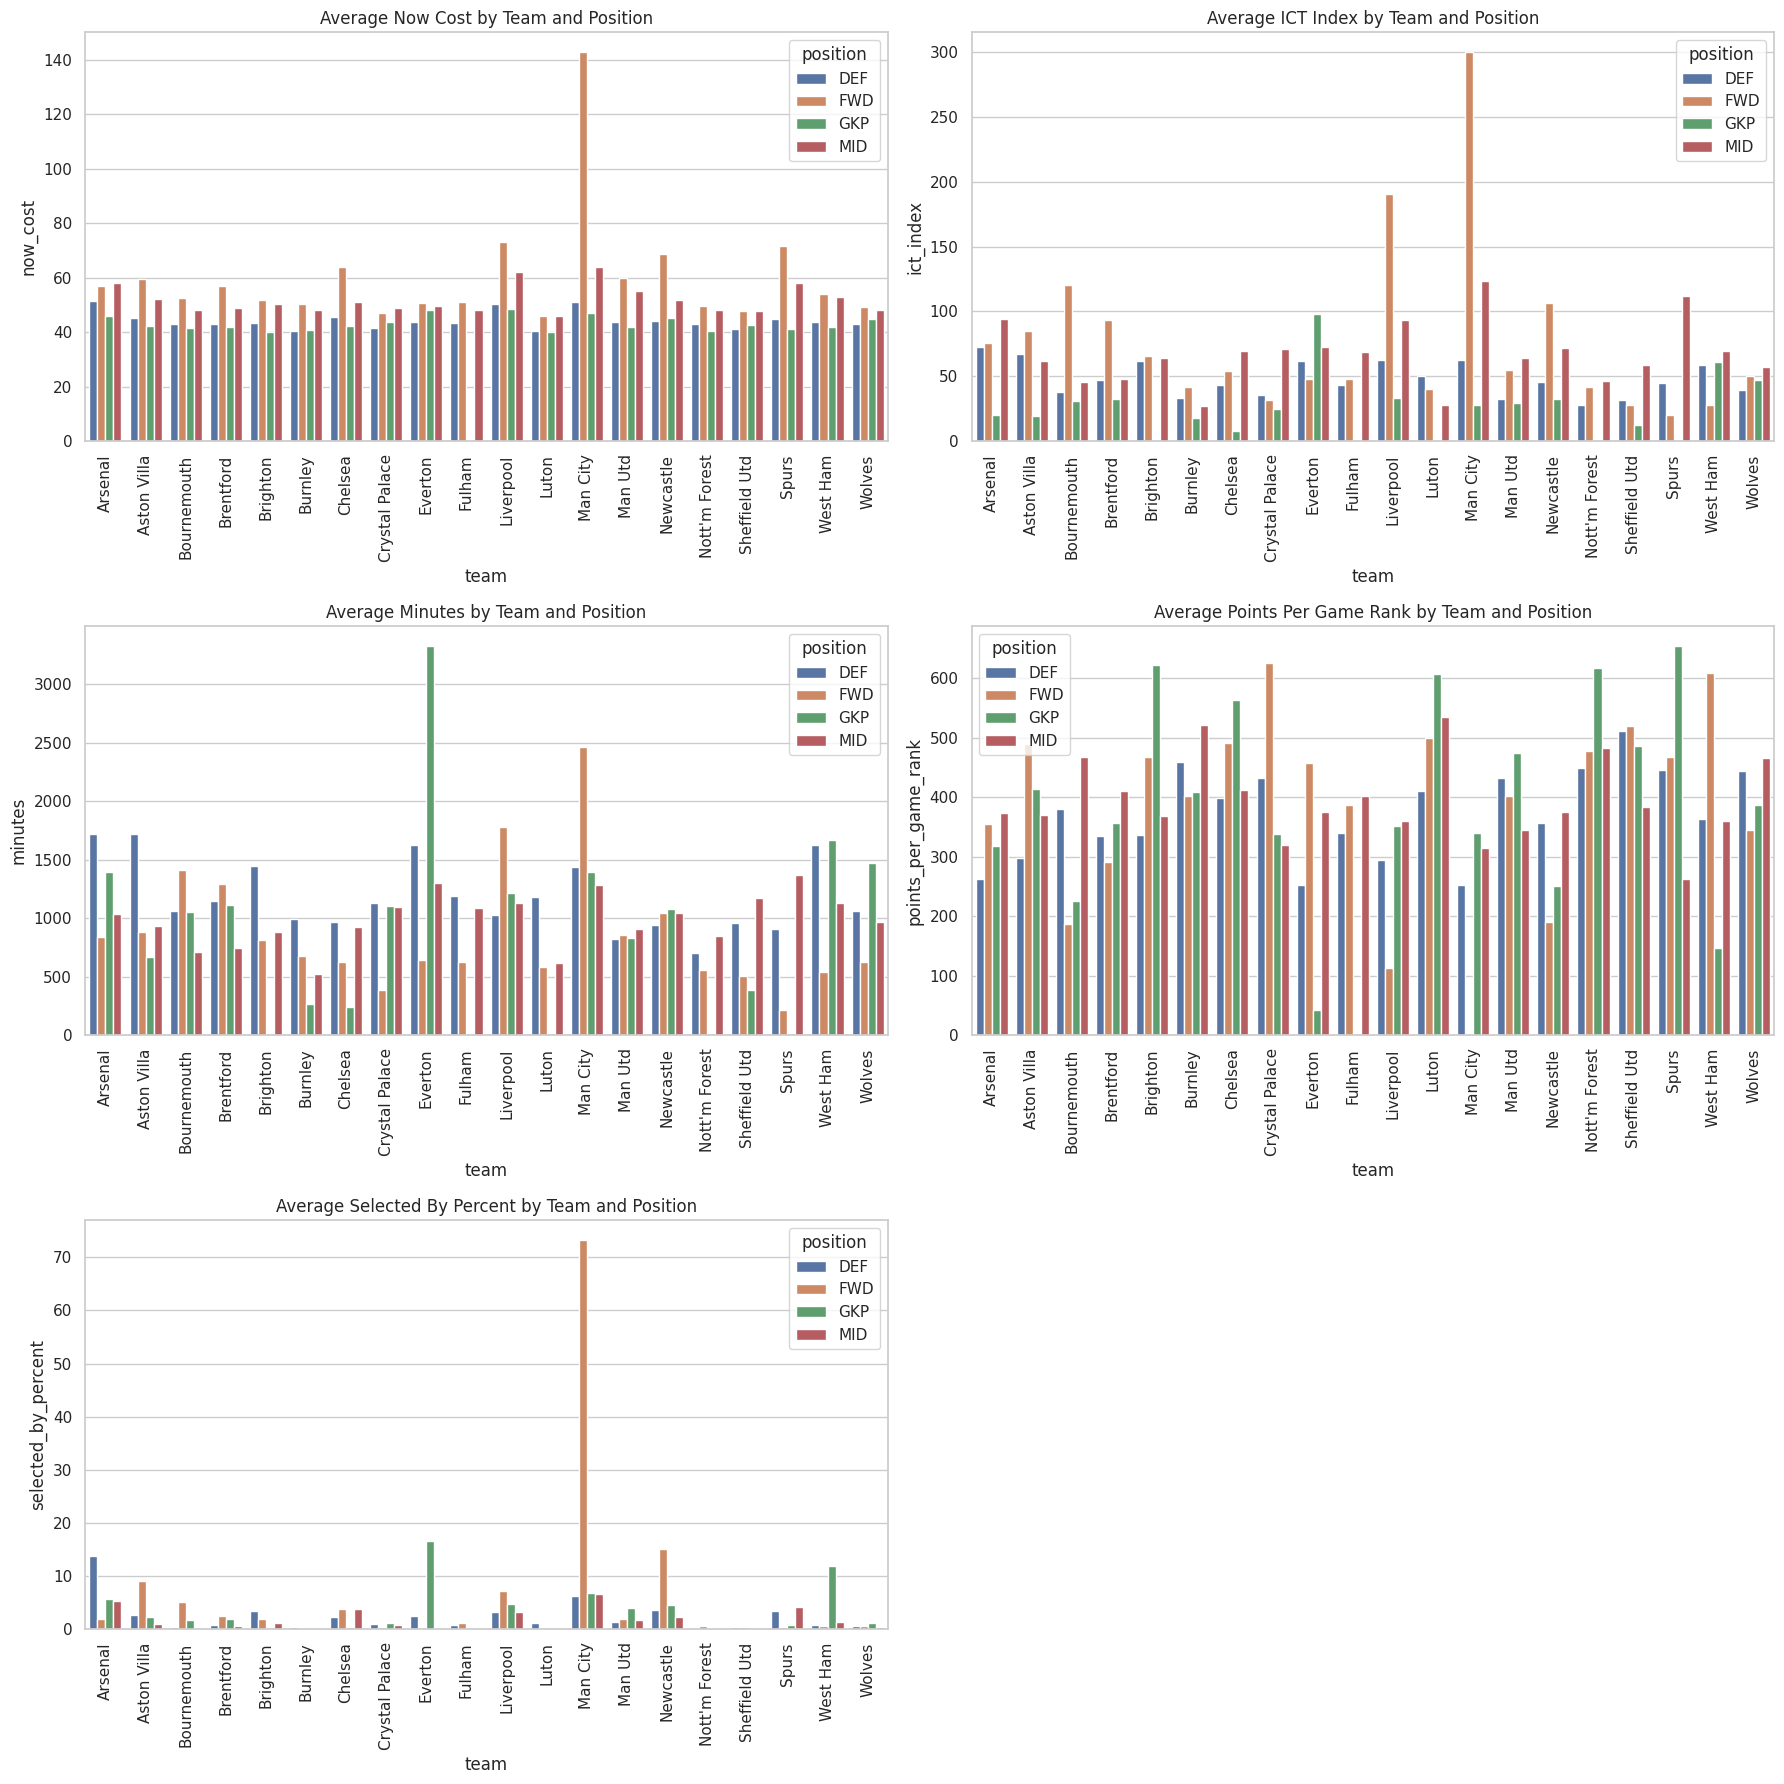

In [28]:
# Calculate average performance metrics by team and position
team_position_stats = data_cleaned.groupby(['team', 'position'])[performance_metrics].mean().reset_index()

# Visualize average performance metrics by team and position
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

# Average Now Cost by Team and Position
sns.barplot(x='team', y='now_cost', hue='position', data=team_position_stats, ax=axes[0, 0])
axes[0, 0].set_title('Average Now Cost by Team and Position')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)

# Average ICT Index by Team and Position
sns.barplot(x='team', y='ict_index', hue='position', data=team_position_stats, ax=axes[0, 1])
axes[0, 1].set_title('Average ICT Index by Team and Position')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)

# Average Minutes by Team and Position
sns.barplot(x='team', y='minutes', hue='position', data=team_position_stats, ax=axes[1, 0])
axes[1, 0].set_title('Average Minutes by Team and Position')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)

# Average Points Per Game Rank by Team and Position
sns.barplot(x='team', y='points_per_game_rank', hue='position', data=team_position_stats, ax=axes[1, 1])
axes[1, 1].set_title('Average Points Per Game Rank by Team and Position')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90)

# Average Selected By Percent by Team and Position
sns.barplot(x='team', y='selected_by_percent', hue='position', data=team_position_stats, ax=axes[2, 0])
axes[2, 0].set_title('Average Selected By Percent by Team and Position')
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=90)

# Remove the empty plot
axes[2, 1].remove()

# Adjust layout
plt.tight_layout()
plt.show()


1.	Average Now Cost by Team and Position:

•	Man City forwards have the highest average now cost.

•	Man City and Liverpool midfielders also have high now costs.

•	Defenders and Goalkeepers across teams generally have lower costs compared to forwards and midfielders.

2.	Average ICT Index by Team and Position:

•	Man City and Liverpool midfielders have the highest average ICT index.

•	Forwards from Man City and Liverpool also show high ICT indices.

•	Defenders and Goalkeepers have lower ICT indices compared to midfielders and forwards.

3.	Average Minutes by Team and Position:

•	Defenders and Goalkeepers from teams like Arsenal, Everton, and Man Utd have higher average minutes.

•	Forwards and Midfielders have more variability in minutes across different teams.

4.	Average Points Per Game Rank by Team and Position:

•	Midfielders and Forwards from Man City, Liverpool, and Arsenal have better points per game ranks.

•	Defenders and Goalkeepers generally have more variability in points per game rank.

5.	Average Selected By Percent by Team and Position:

•	Forwards and Midfielders from Man City, Liverpool, and Arsenal are more frequently selected by users.

•	Defenders and Goalkeepers have lower selection percentages across teams.




**Top Performers in Specific Metrics**

In [29]:
# Identify top performers in ICT Index, Minutes, and Points Per Game Rank for each position

top_performers_by_position = {
    'DEF': {},
    'MID': {},
    'FWD': {},
    'GKP': {}
}

for position in top_performers_by_position.keys():
    top_performers_by_position[position]['ICT Index'] = data_cleaned[data_cleaned['position'] == position].nlargest(5, 'ict_index')[['name', 'team', 'ict_index', 'now_cost', 'minutes', 'points_per_game_rank']]
    top_performers_by_position[position]['Minutes'] = data_cleaned[data_cleaned['position'] == position].nlargest(5, 'minutes')[['name', 'team', 'minutes', 'ict_index', 'now_cost', 'points_per_game_rank']]
    top_performers_by_position[position]['Points Per Game Rank'] = data_cleaned[data_cleaned['position'] == position].nsmallest(5, 'points_per_game_rank')[['name', 'team', 'points_per_game_rank', 'ict_index', 'now_cost', 'minutes']]

top_performers_by_position


{'DEF': {'ICT Index':                        name       team  ict_index  now_cost  minutes  \
  475           Alfie Doughty      Luton      204.4        43     2833   
  754             Pedro Porro      Spurs      199.0        59     3015   
  622         Kieran Trippier  Newcastle      185.0        66     2226   
  425  Trent Alexander-Arnold  Liverpool      179.7        84     2083   
  442        Andrew Robertson  Liverpool      158.4        65     1599   
  
       points_per_game_rank  
  475                   188  
  754                    78  
  622                    44  
  425                    39  
  442                   151  ,
  'Minutes':                  name            team  minutes  ict_index  now_cost  \
  18     William Saliba         Arsenal     3330       97.0        59   
  371   James Tarkowski         Everton     3330      148.2        46   
  404  Antonee Robinson          Fulham     3188      156.3        45   
  330   Tyrick Mitchell  Crystal Palace     3114 